# COVID-19 PROFILES IN SADC
Prepared by Brilliant Chikanya

In [68]:
df.columns isin ['new_cases_smoothed', 'new_deaths_smoothed', 'total_deaths_per_million']

SyntaxError: invalid syntax (3216779846.py, line 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv('owid-covid-data.csv', parse_dates=[3])


In [59]:
df.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vac

In [2]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
df.set_index('date', inplace=True)
df.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,AFG,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-25,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-26,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-27,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2020-02-28,AFG,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
sadc = ['Zimbabwe', 'Zambia', 'Botswana', 'South Africa', 'Namibia']

In [5]:
dfs = []
for i in sadc:
    BM = df['location'] == i
    data = df[BM]
    dfs.append(data)
    
df1 = pd.concat(dfs)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4005 entries, 2020-03-20 to 2022-05-21
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    4005 non-null   object 
 1   continent                                   4005 non-null   object 
 2   location                                    4005 non-null   object 
 3   total_cases                                 3978 non-null   float64
 4   new_cases                                   3968 non-null   float64
 5   new_cases_smoothed                          3943 non-null   float64
 6   total_deaths                                3819 non-null   float64
 7   new_deaths                                  3816 non-null   float64
 8   new_deaths_smoothed                         3791 non-null   float64
 9   total_cases_per_million                     3978 non-null   float64

In [6]:
df1[::100]

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-03-20,ZWE,Africa,Zimbabwe,1.0,1.0,NaN,NaN,NaN,NaN,0.066,...,1.6,30.7,36.791,1.70,61.49,0.571,NaN,NaN,NaN,NaN
2020-06-28,ZWE,Africa,Zimbabwe,567.0,0.0,11.143,6.0,0.0,0.000,37.569,...,1.6,30.7,36.791,1.70,61.49,0.571,NaN,NaN,NaN,NaN
2020-10-06,ZWE,Africa,Zimbabwe,7915.0,17.0,11.143,229.0,1.0,0.143,524.444,...,1.6,30.7,36.791,1.70,61.49,0.571,NaN,NaN,NaN,NaN
2021-01-14,ZWE,Africa,Zimbabwe,25368.0,1112.0,956.143,636.0,47.0,27.143,1680.871,...,1.6,30.7,36.791,1.70,61.49,0.571,NaN,NaN,NaN,NaN
2021-04-24,ZWE,Africa,Zimbabwe,38064.0,19.0,52.143,1556.0,0.0,0.571,2522.102,...,1.6,30.7,36.791,1.70,61.49,0.571,NaN,NaN,NaN,NaN
2021-08-02,ZWE,Africa,Zimbabwe,110855.0,1309.0,1558.714,3635.0,52.0,66.000,7345.199,...,1.6,30.7,36.791,1.70,61.49,0.571,NaN,NaN,NaN,NaN
2021-11-10,ZWE,Africa,Zimbabwe,133302.0,60.0,30.143,4694.0,3.0,1.429,8832.526,...,1.6,30.7,36.791,1.70,61.49,0.571,NaN,NaN,NaN,NaN
2022-02-18,ZWE,Africa,Zimbabwe,233030.0,432.0,259.429,5385.0,4.0,1.571,15440.456,...,1.6,30.7,36.791,1.70,61.49,0.571,NaN,NaN,NaN,NaN
2020-03-25,ZMB,Africa,Zambia,12.0,9.0,1.429,NaN,NaN,NaN,0.634,...,3.1,24.7,13.938,2.00,63.89,0.584,NaN,NaN,NaN,NaN


In [7]:
df1['new_cases'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 4005 entries, 2020-03-20 to 2022-05-21
Series name: new_cases
Non-Null Count  Dtype  
--------------  -----  
3968 non-null   float64
dtypes: float64(1)
memory usage: 62.6 KB


In [8]:
zim = df1[df1['location'] =='Zimbabwe']
zim.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-03-20,ZWE,Africa,Zimbabwe,1.0,1.0,NaN,NaN,NaN,NaN,0.066,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2020-03-21,ZWE,Africa,Zimbabwe,3.0,2.0,NaN,NaN,NaN,NaN,0.199,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2020-03-22,ZWE,Africa,Zimbabwe,3.0,0.0,NaN,NaN,NaN,NaN,0.199,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2020-03-23,ZWE,Africa,Zimbabwe,3.0,0.0,NaN,1.0,1.0,NaN,0.199,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
2020-03-24,ZWE,Africa,Zimbabwe,3.0,0.0,NaN,1.0,0.0,NaN,0.199,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [35]:
criteria = zim.index.month

In [53]:
def plot_monthly_cases(country):
    """
    This function plots the monthly average cases of covid-19 recorded by each country
    """
    
    data = df1[df1['location'] == country]
    
    criteria = data.index.month
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    
    y = data['new_cases'].groupby(criteria).mean()
    plt.bar(months, y)
    #plt.xticks(months, rotation=90)
    plt.xlabel('Source:https://ourworldindata.org')
    plt.ylabel('Average covid-19 cases')
    plt.title('Average monthly recorded cases in' + ' ' + country)
    
    

plt.show    

<function matplotlib.pyplot.show(close=None, block=None)>

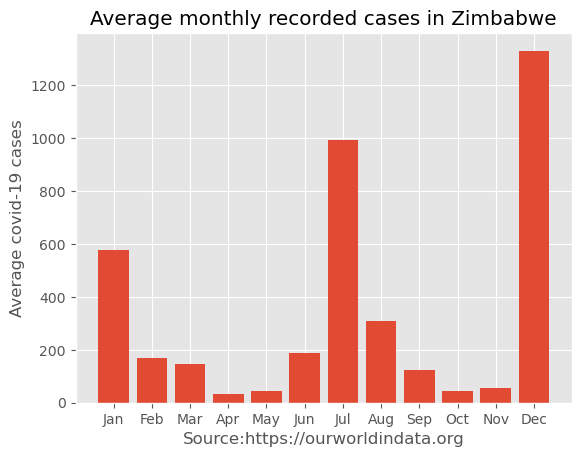

In [54]:
plot_monthly_cases('Zimbabwe')

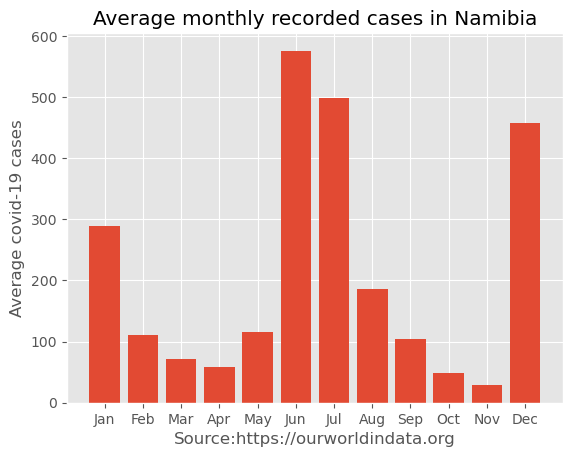

In [55]:
plot_monthly_cases('Namibia')

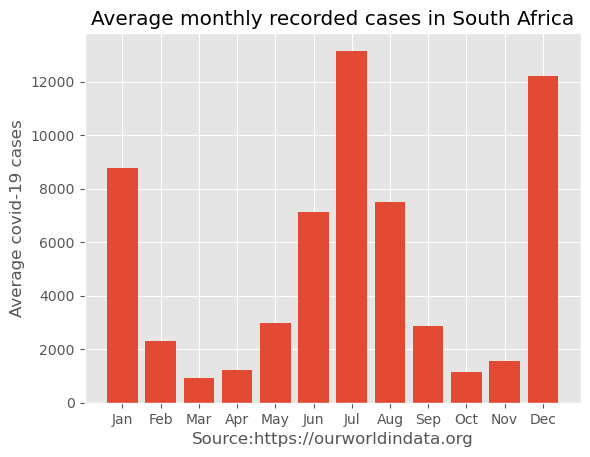

In [56]:
plot_monthly_cases('South Africa')

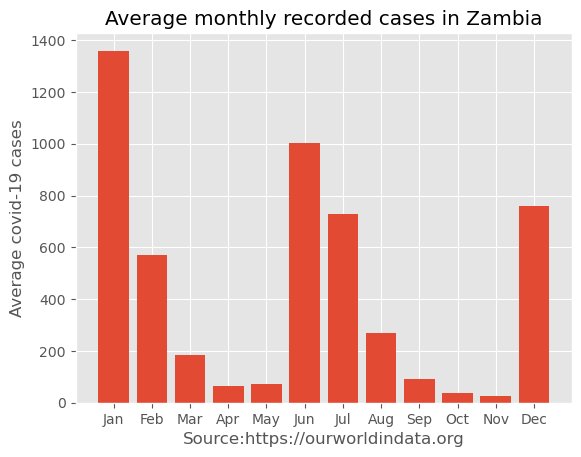

In [57]:
plot_monthly_cases('Zambia')

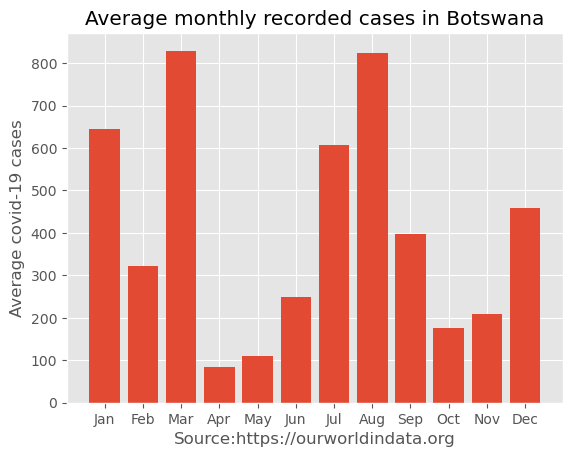

In [58]:
plot_monthly_cases('Botswana')

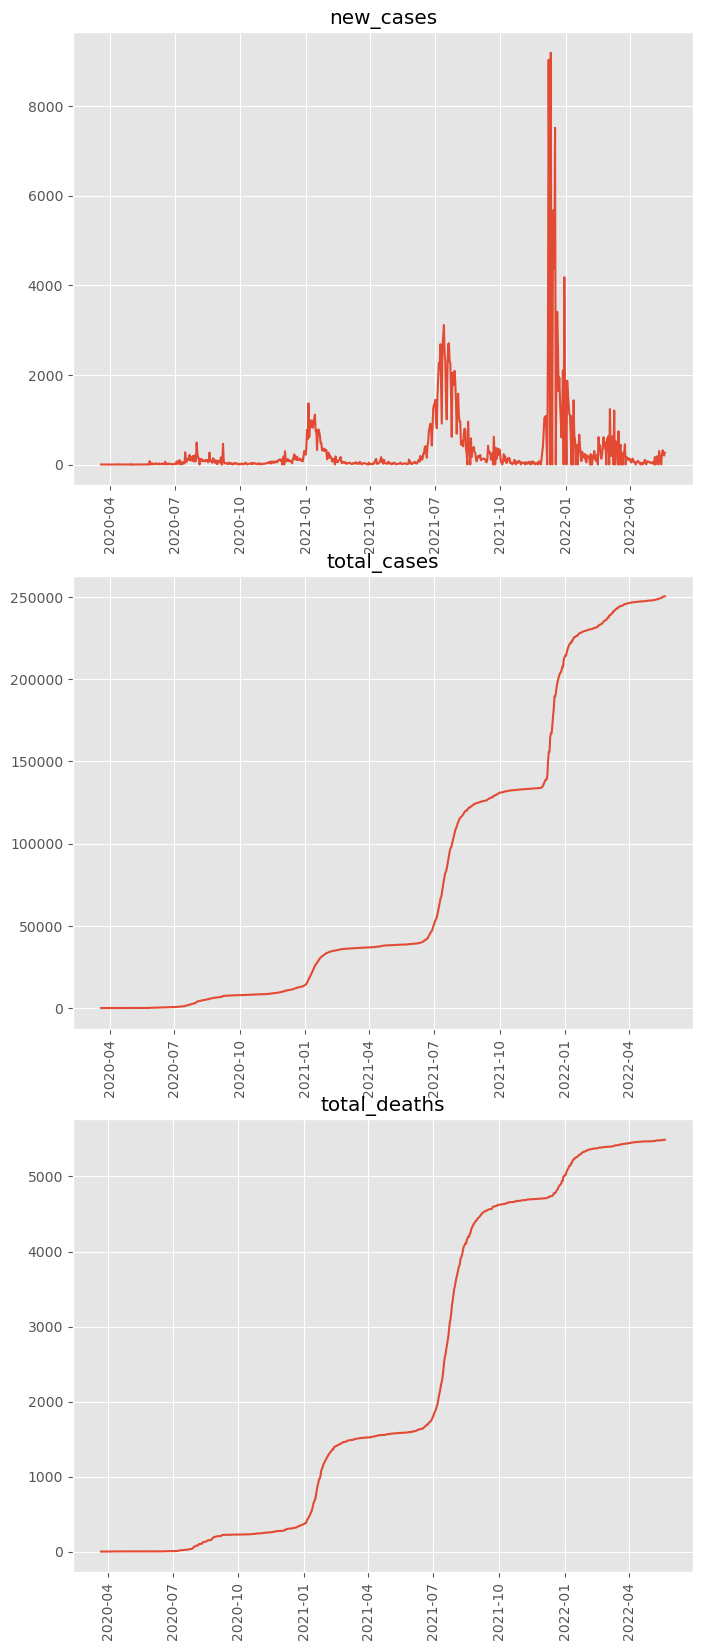

In [29]:
plt.style.use('ggplot')
filters = ['new_cases', 'total_cases', 'total_deaths']
fig, ax = plt.subplots(3, 1, figsize=(8, 20))
for i, f in enumerate(filters):
    BM = f
    plt.subplot(3, 1, i+1)
    plt.plot(zim[f], label=f)
    plt.xticks(rotation=90)
    plt.title(f)
plt.show()

In [74]:
# Extract a dataframe for a country, e.g Zimbabwe
def plot_country(country):
    """ 
    This is a function that takes in a country's name and plots three graphs
     the first for new cases, secondly, total cases, and lastly total deaths
    data = df1[df1['location'] == country]
    """
    
    filters = ['new_cases', 'total_cases', 'total_deaths']
    
    data = df1[df1['location'] == country]
    
        
    fig, ax = plt.subplots(3, 1, figsize=(8, 24))
    
    for i, f in enumerate(filters):
        BM = f
        plt.subplot(3, 1, i+1)
        plt.plot(data[f], label=f)
        plt.xticks(rotation=90)
        plt.title(country + ' ' + f)

plt.tight_layout()
plt.show()
    

<Figure size 640x480 with 0 Axes>

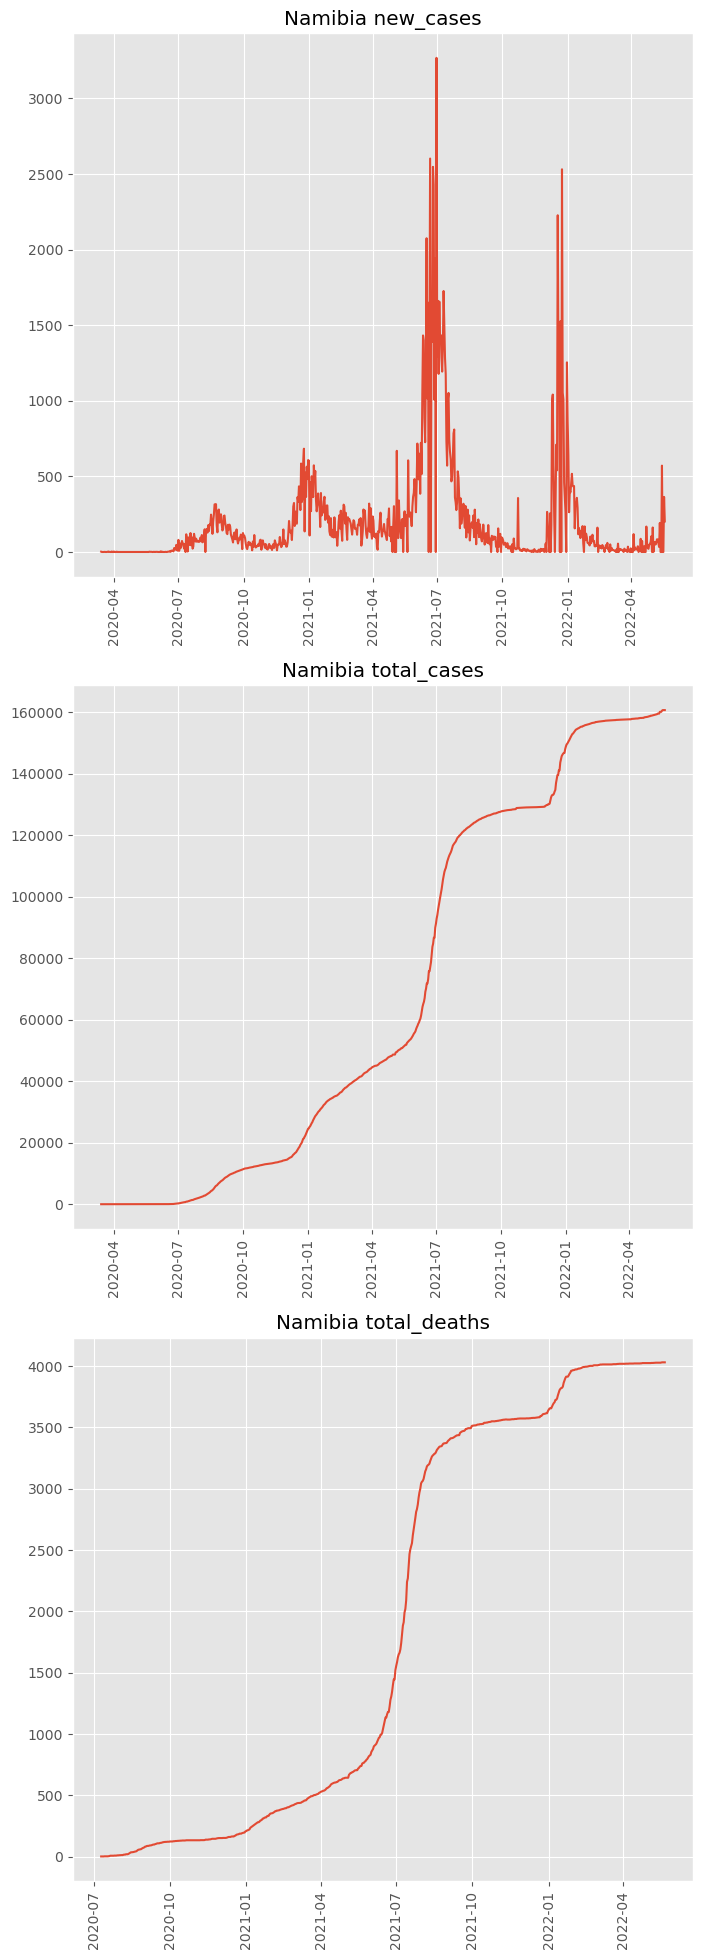

In [75]:
plot_country('Namibia')

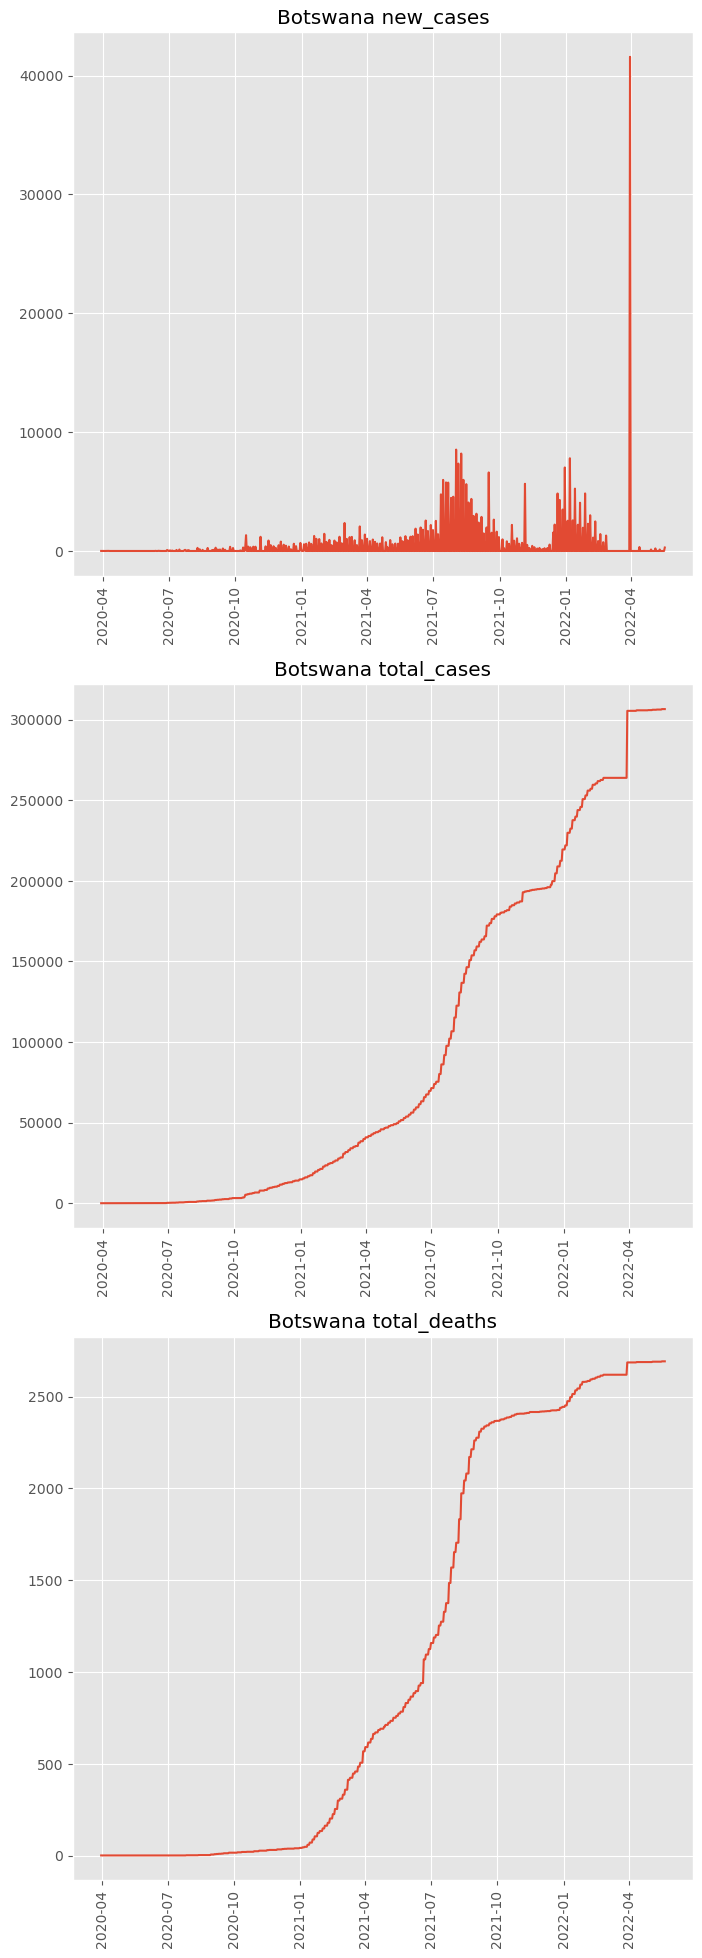

In [71]:
plot_country('Botswana')

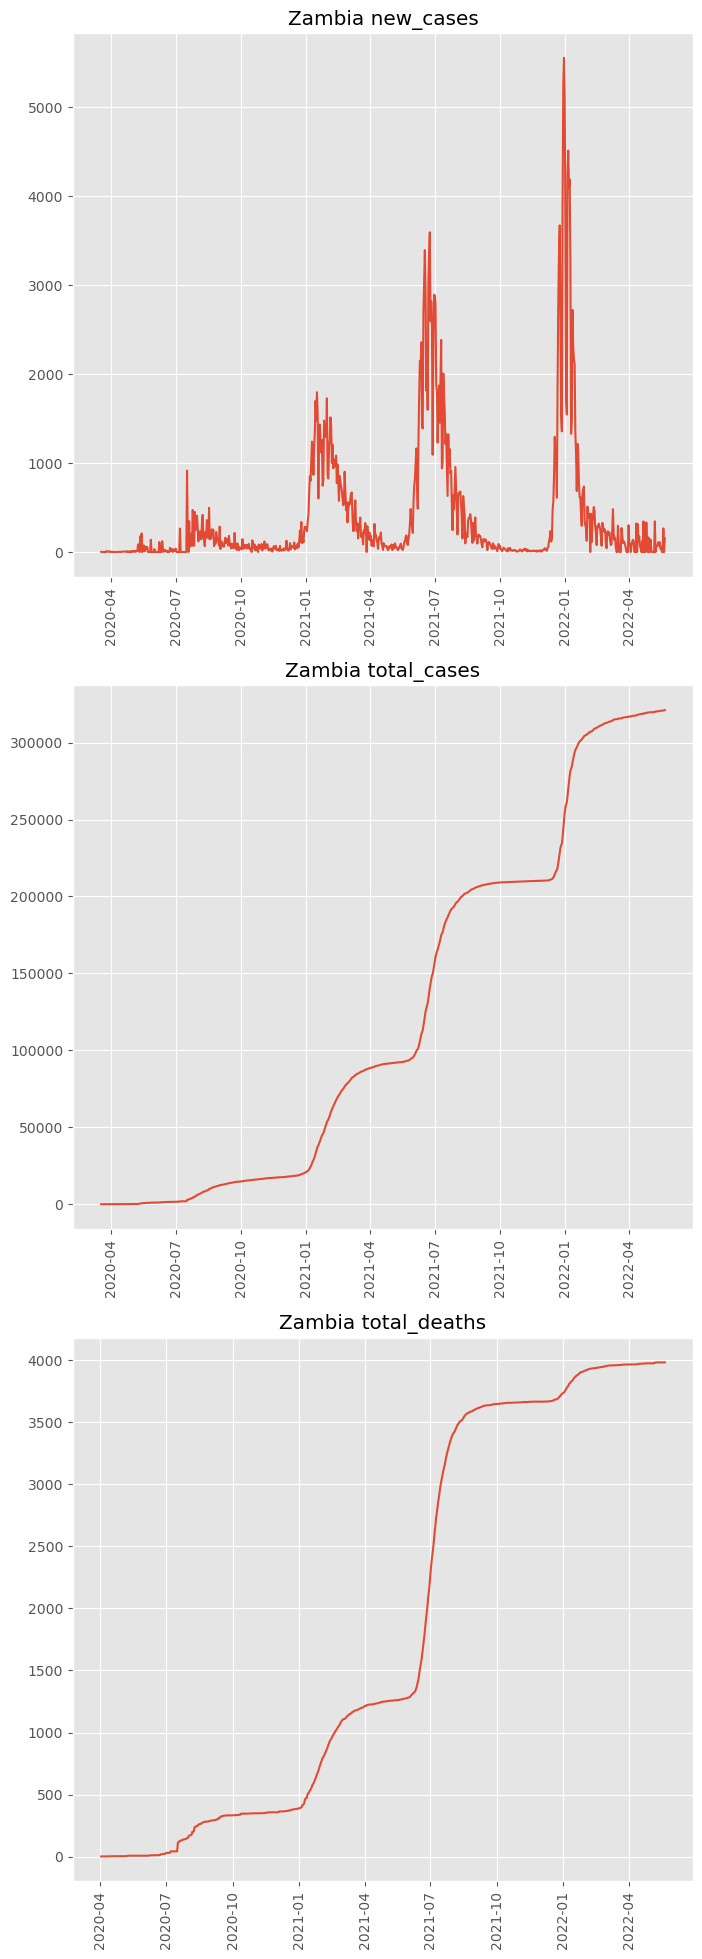

In [32]:
plot_country('Zambia')

In [64]:
def another_plot_country(country):
    """ 
    This is a function that takes in a country's name and plots three graphs
     the first for new cases smoothed, secondly, new deaths smoothed, and lastly total deaths per million
    """
    
    filters = ['new_cases_smoothed', 'new_deaths_smoothed', 'total_deaths_per_million']
    
    data = df1[df1['location'] == country]
    
        
    fig, ax = plt.subplots(3, 1, figsize=(8, 24))
    
    for i, f in enumerate(filters):
        BM = f
        plt.subplot(3, 1, i+1)
        plt.plot(data[f], label=f)
        plt.xticks(rotation=90)
        plt.title(country + ' ' + f)


plt.show()

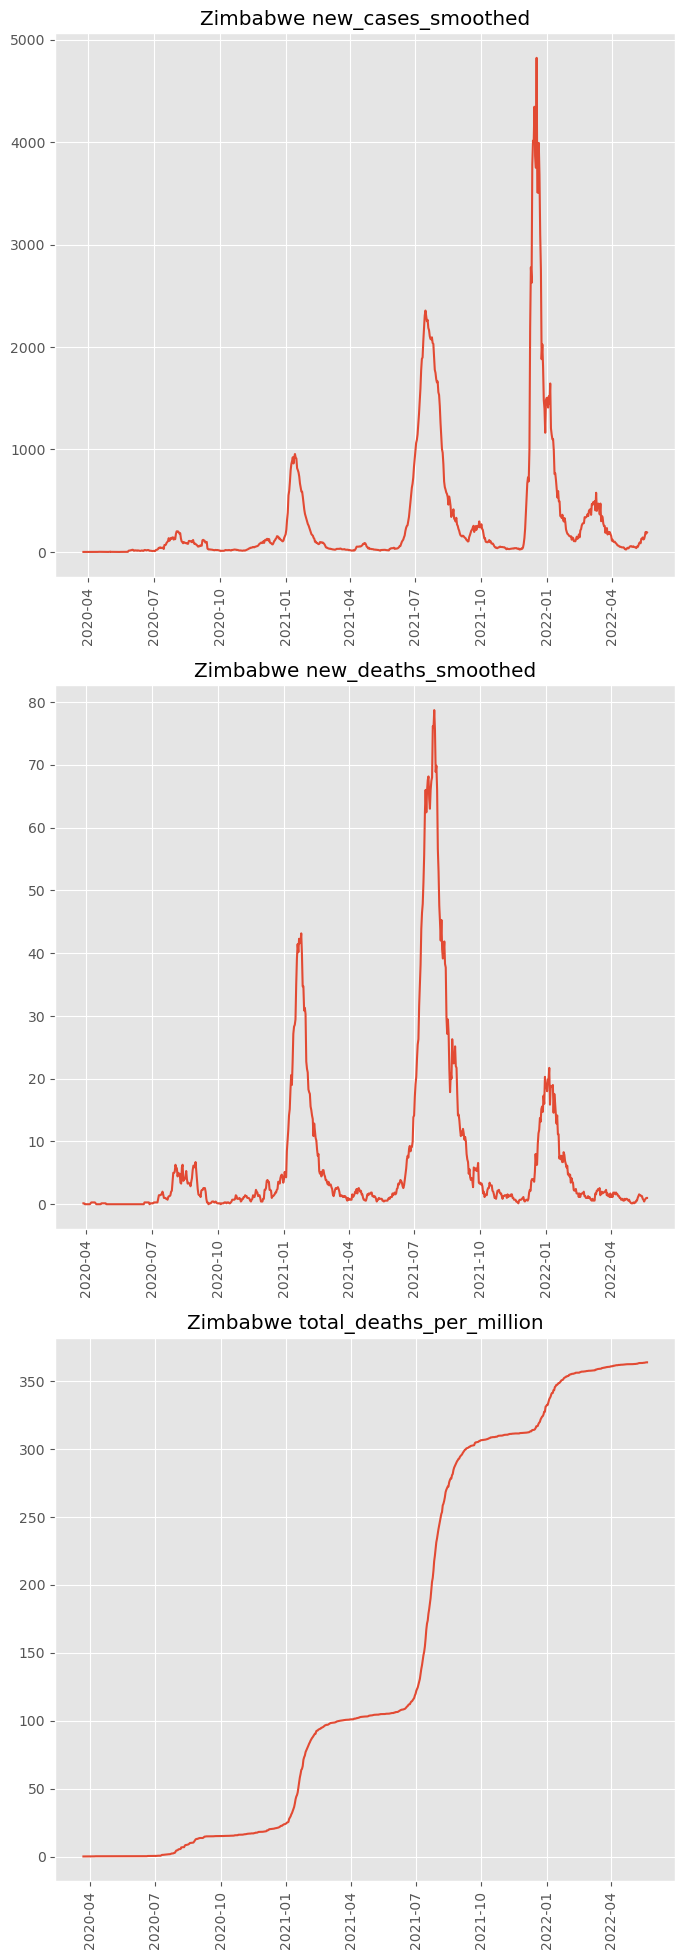

In [65]:
another_plot_country('Zimbabwe')

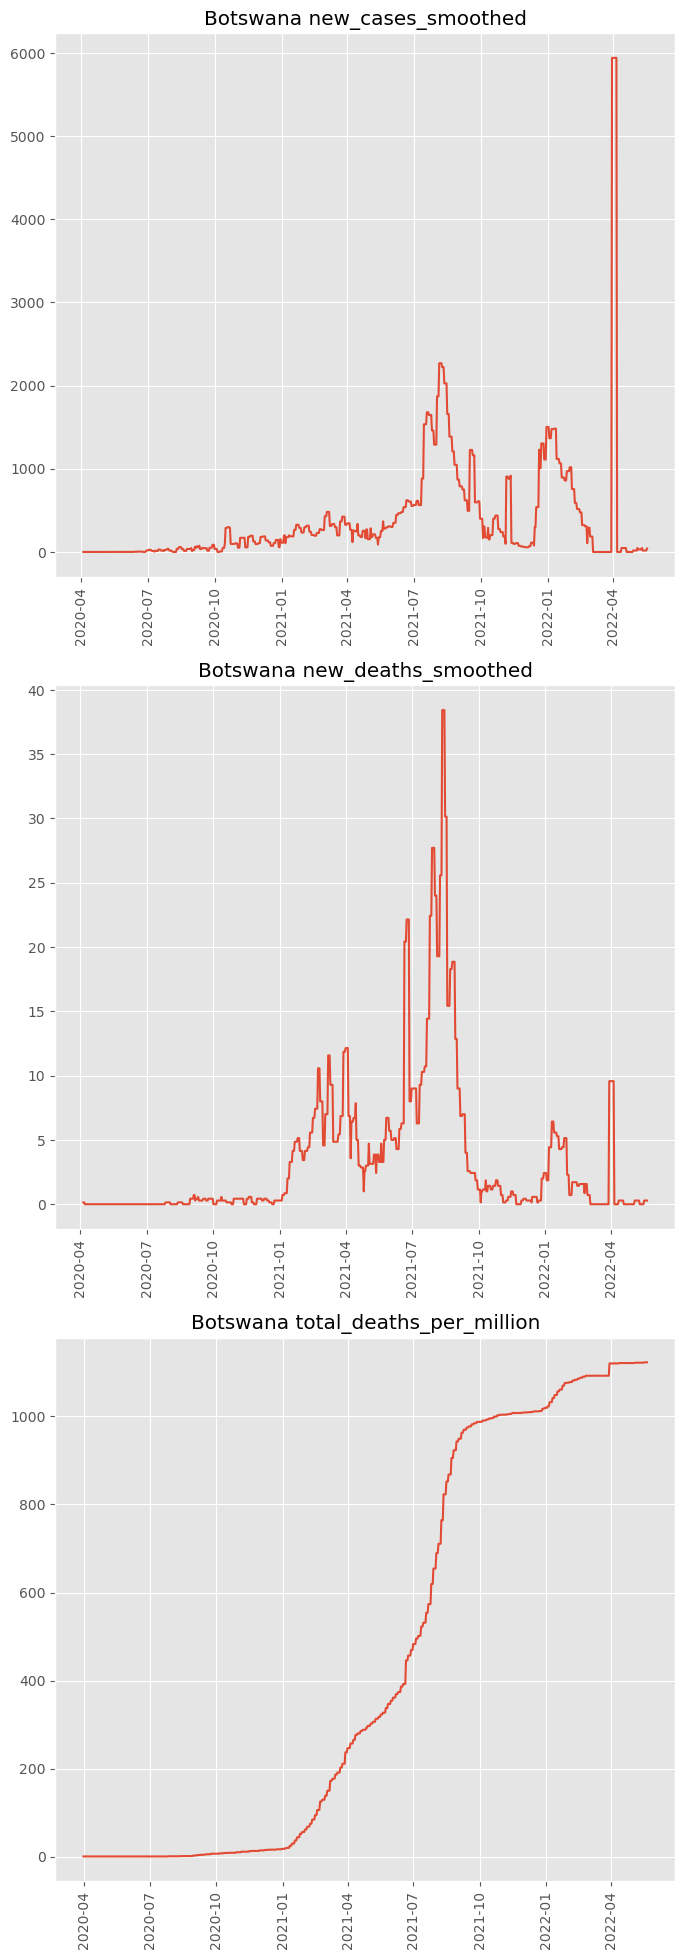

In [66]:
another_plot_country('Botswana')